# Teste Mann Whitney (soma de postos de Wilcoxon)

Teste não paramétrico <br><br>
Duas amostras independentes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
enem_sp = pd.read_csv('data/enem_2019-tratado.csv', sep=',', encoding='iso-8859-1') 

In [3]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [4]:
colegiox_M = colegiox.loc[colegiox.SEXO == "F"]

In [5]:
colegiox_H = colegiox.loc[colegiox.SEXO == "M"]

Objetivo: Analisar a diferença entre as MEDIANAS de mulheres e homens para as notas do colégio X.

In [6]:
stats.shapiro(colegiox_M.NOTA_MT)

ShapiroResult(statistic=0.7194505929946899, pvalue=5.430648343462963e-06)

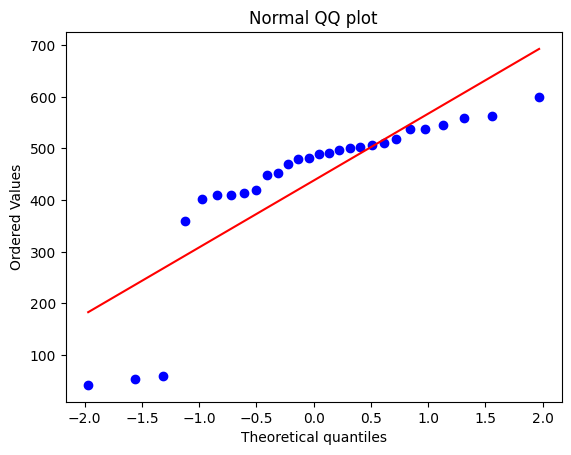

In [7]:
stats.probplot(colegiox_M['NOTA_MT'], dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()

In [8]:
stats.shapiro(colegiox_H.NOTA_MT)

ShapiroResult(statistic=0.8659597635269165, pvalue=0.04620101675391197)

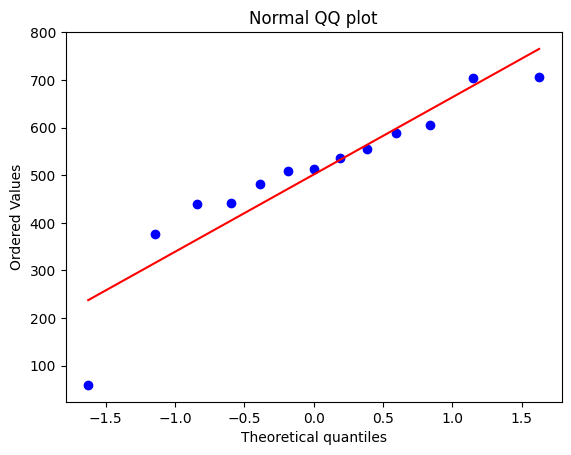

In [9]:
stats.probplot(colegiox_H['NOTA_MT'], dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()
# Mais próxima de uma normal

In [10]:
stats.shapiro(colegiox_M.NOTA_CN)
# Não é normal

ShapiroResult(statistic=0.7065988779067993, pvalue=3.536293434081017e-06)

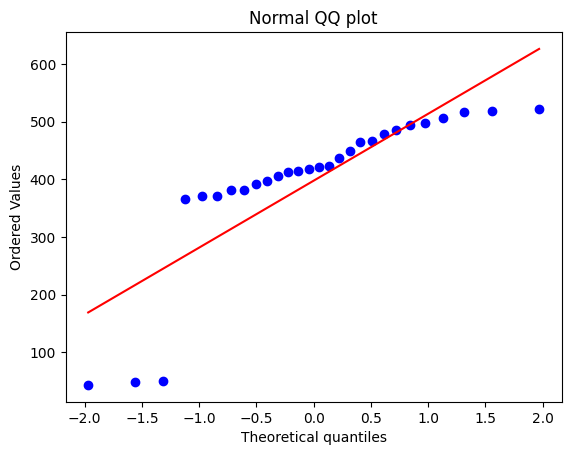

In [11]:
stats.probplot(colegiox_M['NOTA_CN'], dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()

In [12]:
stats.shapiro(colegiox_H.NOTA_CN)
# Não é normal

ShapiroResult(statistic=0.7647997736930847, pvalue=0.0026814276352524757)

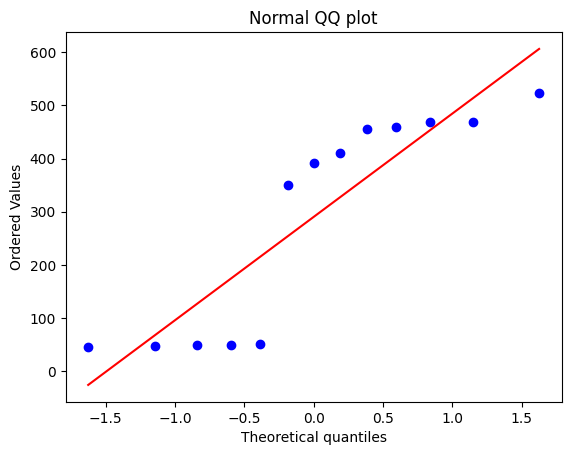

In [13]:
stats.probplot(colegiox_H['NOTA_CN'], dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()

## Teste Mann Whitney

Comparação das medianas das notas dos homens e mulheres do colégio X.

H0 = Não há diferença <br>
Ha = Há diferença

In [14]:
stat, p = stats.mannwhitneyu(colegiox_M.NOTA_MT, colegiox_H.NOTA_MT)
print(f"Estatística de teste: {stat}")
print(f"P-valor: {p:.3f}")

Estatística de teste: 127.0
P-valor: 0.127


In [15]:
stats.mannwhitneyu(colegiox_M.NOTA_MT, colegiox_H.NOTA_MT)

MannwhitneyuResult(statistic=127.0, pvalue=0.12678483629218537)

In [16]:
stat, p = stats.mannwhitneyu(colegiox_M.NOTA_CH, colegiox_H.NOTA_CH)
print(f"Estatística de teste: {stat:.4f}")
print(f"         P-valor: {p:.10f}")

Estatística de teste: 168.5000
         P-valor: 0.7156851140


In [17]:
stat, p = stats.mannwhitneyu(colegiox_M.NOTA_CN, colegiox_H.NOTA_CN)
print(f"Estatística de teste: {stat:.4f}")
print(f"         P-valor: {p:.10f}")

Estatística de teste: 228.0000
         P-valor: 0.2023960160


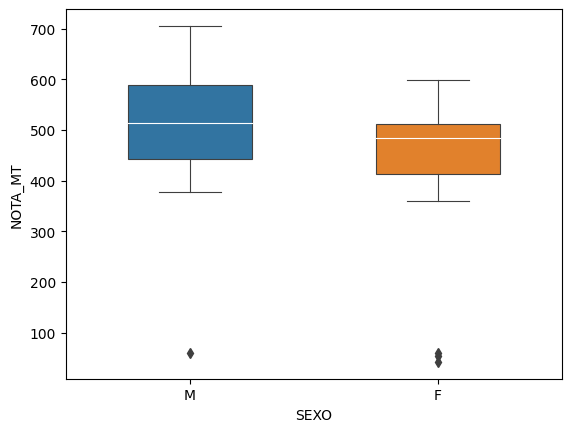

In [21]:
sns.boxplot(data=colegiox, x='SEXO', y='NOTA_MT', 
            saturation=0.75, width=0.5, linewidth=0.8, medianprops={"color": "white"});

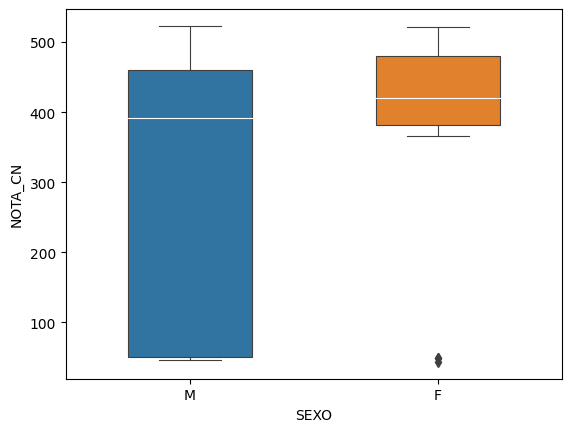

In [23]:
sns.boxplot(data=colegiox, x='SEXO', y='NOTA_CN', 
            saturation=0.75, width=0.5, linewidth=0.8, medianprops={"color": "white"});

### Conclusão:
Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a mediana das notas de Matemática e Ciências da natureza do colégio X sejam diferentes entre homens e mulheres.